In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
from itertools import permutations
from time import time
from stockAnalysisTools import numToString

#### The cell below will be used to pull all the stock data we want and make a dictionary for accessing it

In [2]:
quandl.ApiConfig.api_key = "d1JcayaRuvKSaq7GaEHs"
aapl = "aapl"
goog  = "goog"
msft = "msft"
amzn = "amzn"
stockList = [aapl, goog, msft, amzn]
finData = dict()

t0 = time()

for ticker in stockList:
    finData[ticker] = quandl.get("WIKI/"+ticker)["Adj. Close"]
    
print("Run time:", round(time()-t0, 3), "s")

Run time: 9.577 s


In [3]:
class Stock(object):
    
    def __init__(self, name):
        self.name = name
        self.percentage = 0.0
        
    def set_portfolio_percentage(self, val):
        self.percentage = val/100.0

In [4]:
class Portfolio(object):
    stocks = list()
    uninvestedMoney = 0
    
    def addStock(self, stock):
        
        if(stock.name not in finData.keys()):
            print("We haven't pulled up data for this stock, so it can't be added")
            return
        
        self.stocks.append(stock)
    
    def addMoney(self, money):
        
        self.uninvestedMoney += money
        
    def reset(self):
        self.uninvestedMoney = 0
        if len(self.stocks) != 0:
            self.stocks = []
            
    def validity_check(self):
        sum_of_percentage = 0.0
        for stock in self.stocks:
            sum_of_percentage += stock.percentage
            
        if(sum_of_percentage == 1):
            return True
        else:
            return False

#### Creating Portfolio

In [5]:
my_portfolio = Portfolio()
my_portfolio.addMoney(100)
aapl = Stock("aapl")
goog = Stock("goog")
msft = Stock("msft")
amzn = Stock("amzn")
my_portfolio.addStock(aapl)
my_portfolio.addStock(goog)
my_portfolio.addStock(msft)
my_portfolio.addStock(amzn)

### Combinations Generated

In [52]:
#creating possible values of the combination of stock weights
list_of_values = []
# for i in range(101):
#     for j in range(4):
#         list_of_values.append(i)
        
# perm = permutations(list_of_values, len(my_portfolio.stocks))
t0 = time()
for i in range(101):
    for j in range(101):
        for k in range(101):
            for l in range(101):
                
                if(i+j+k+l == 100):
                    list_of_values.append((i,j,k,l))
print("Run time:", round(time()-t0, 3), "s")

Run time: 28.635 s


In [20]:
print(len(list_of_values))

176851


### Calculating Rolling Stats

In [12]:
startDate = '2001-07-01'
endDate = '2018-07-01'

aaplReturn = finData[aapl.name].loc[startDate: endDate].pct_change().shift(-1).dropna()
aaplRollingStat = finData[aapl.name].loc[startDate: endDate].rolling(window=30,center=False).mean().dropna()
aaplRollingStd = finData[aapl.name].loc[startDate: endDate].rolling(window=30,center=False).std().dropna()

aaplRollingStat = aaplRollingStat.reset_index()

aaplRollingStat = aaplRollingStat.rename(index=str, columns={"Adj. Close": "Rolling Mean"})
aaplRollingStat["Std"] = aaplRollingStd.values
aaplRollingStat["Upper Band"] = aaplRollingStat.apply(lambda row: row["Rolling Mean"] + 2*row["Std"], axis=1)
aaplRollingStat["Lower Band"] = aaplRollingStat.apply(lambda row: row["Rolling Mean"] - 2*row["Std"], axis=1)

aaplRollingStat = aaplRollingStat.set_index("Date")

aaplRollingStat["Adj. Close"] = finData[aapl.name]

,Adj. Close
Date,
2001-08-13,1.226666
2001-08-14,1.203533
2001-08-15,1.184899
2001-08-16,1.198392
2001-08-17,1.161123
2001-08-20,1.164336
2001-08-21,1.151485
2001-08-22,1.170119
2001-08-23,1.144417


In [54]:
startDate = '2001-07-01'
endDate = '2018-07-01'

googReturn = finData[goog.name].loc[startDate: endDate].pct_change().shift(-1).dropna()
googRollingStat = finData[goog.name].loc[startDate: endDate].rolling(window=30,center=False).mean().dropna()
googRollingStd = finData[goog.name].loc[startDate: endDate].rolling(window=30,center=False).std().dropna()

googRollingStat = googRollingStat.reset_index()

googRollingStat = googRollingStat.rename(index=str, columns={"Adj. Close": "Rolling Mean"})
googRollingStat["Std"] = googRollingStd.values
googRollingStat["Upper Band"] = googRollingStat.apply(lambda row: row["Rolling Mean"] + 2*row["Std"], axis=1)
googRollingStat["Lower Band"] = googRollingStat.apply(lambda row: row["Rolling Mean"] - 2*row["Std"], axis=1)

googRollingStat = googRollingStat.set_index("Date")

googRollingStat["Adj. Close"] = finData[goog.name]
# googRollingStat

In [55]:
startDate = '2001-07-01'
endDate = '2018-07-01'

msftReturn = finData[msft.name].loc[startDate: endDate].pct_change().shift(-1).dropna()
msftRollingStat = finData[msft.name].loc[startDate: endDate].rolling(window=30,center=False).mean().dropna()
msftRollingStd = finData[msft.name].loc[startDate: endDate].rolling(window=30,center=False).std().dropna()

msftRollingStat = msftRollingStat.reset_index()

msftRollingStat = msftRollingStat.rename(index=str, columns={"Adj. Close": "Rolling Mean"})
msftRollingStat["Std"] = msftRollingStd.values
msftRollingStat["Upper Band"] = msftRollingStat.apply(lambda row: row["Rolling Mean"] + 2*row["Std"], axis=1)
msftRollingStat["Lower Band"] = msftRollingStat.apply(lambda row: row["Rolling Mean"] - 2*row["Std"], axis=1)

msftRollingStat = msftRollingStat.set_index("Date")

msftRollingStat["Adj. Close"] = finData[msft.name]
# msftRollingStat

In [56]:
startDate = '2001-07-01'
endDate = '2018-07-01'

amznReturn = finData[amzn.name].loc[startDate: endDate].pct_change().shift(-1).dropna()
amznRollingStat = finData[amzn.name].loc[startDate: endDate].rolling(window=30,center=False).mean().dropna()
amznRollingStd = finData[amzn.name].loc[startDate: endDate].rolling(window=30,center=False).std().dropna()

amznRollingStat = amznRollingStat.reset_index()

amznRollingStat = amznRollingStat.rename(index=str, columns={"Adj. Close": "Rolling Mean"})
amznRollingStat["Std"] = amznRollingStd.values
amznRollingStat["Upper Band"] = amznRollingStat.apply(lambda row: row["Rolling Mean"] + 2*row["Std"], axis=1)
amznRollingStat["Lower Band"] = amznRollingStat.apply(lambda row: row["Rolling Mean"] - 2*row["Std"], axis=1)

amznRollingStat = amznRollingStat.set_index("Date")

amznRollingStat["Adj. Close"] = finData[amzn.name]
# amznRollingStat

### Returns Calculations

In [57]:
aaplRollingStat = aaplRollingStat.reset_index()
aaplRollingStat["Buy Day"] = aaplRollingStat.apply(lambda row: 1 if row["Adj. Close"] < row["Lower Band"] else 0, axis=1)
aaplRollingStat["Sell Day"] = aaplRollingStat.apply(lambda row: 1 if row["Adj. Close"] > row["Upper Band"] else 0, axis=1)
aaplRollingStat = aaplRollingStat.set_index("Date")


return_aapl = pd.DataFrame()
return_aapl["Position"] =aaplRollingStat["Buy Day"]
return_aapl["Adj. Close"] = aaplRollingStat["Adj. Close"]

return_aapl["Returns"] = aaplReturn *  return_aapl["Position"]
return_aapl["Returns"] = return_aapl["Returns"].dropna()

In [58]:
googRollingStat = googRollingStat.reset_index()
googRollingStat["Buy Day"] = googRollingStat.apply(lambda row: 1 if row["Adj. Close"] < row["Lower Band"] else 0, axis=1)
googRollingStat["Sell Day"] = googRollingStat.apply(lambda row: 1 if row["Adj. Close"] > row["Upper Band"] else 0, axis=1)
googRollingStat = googRollingStat.set_index("Date")


return_goog = pd.DataFrame()
return_goog["Position"] =googRollingStat["Buy Day"]
return_goog["Adj. Close"] = googRollingStat["Adj. Close"]

return_goog["Returns"] = googReturn *  return_goog["Position"]
return_goog["Returns"] = return_goog["Returns"].dropna()

#Done to match aapl's data
return_goog = return_goog.reindex(return_aapl.index)
return_goog["Returns"] = return_goog["Returns"].replace(np.nan, 0)
return_goog["Returns"][-1] = np.nan

In [59]:
msftRollingStat = msftRollingStat.reset_index()
msftRollingStat["Buy Day"] = msftRollingStat.apply(lambda row: 1 if row["Adj. Close"] < row["Lower Band"] else 0, axis=1)
msftRollingStat["Sell Day"] = msftRollingStat.apply(lambda row: 1 if row["Adj. Close"] > row["Upper Band"] else 0, axis=1)
msftRollingStat = msftRollingStat.set_index("Date")


return_msft = pd.DataFrame()
return_msft["Position"] =msftRollingStat["Buy Day"]
return_msft["Adj. Close"] = msftRollingStat["Adj. Close"]

return_msft["Returns"] = msftReturn *  return_msft["Position"]
return_msft["Returns"] = return_msft["Returns"].dropna()

In [60]:
amznRollingStat = amznRollingStat.reset_index()
amznRollingStat["Buy Day"] = amznRollingStat.apply(lambda row: 1 if row["Adj. Close"] < row["Lower Band"] else 0, axis=1)
amznRollingStat["Sell Day"] = amznRollingStat.apply(lambda row: 1 if row["Adj. Close"] > row["Upper Band"] else 0, axis=1)
amznRollingStat = amznRollingStat.set_index("Date")


return_amzn = pd.DataFrame()
return_amzn["Position"] =amznRollingStat["Buy Day"]
return_amzn["Adj. Close"] = amznRollingStat["Adj. Close"]

return_amzn["Returns"] = amznReturn *  return_amzn["Position"]
return_amzn["Returns"] = return_amzn["Returns"].dropna()

### Plot Generated

Run time: 576.707 s


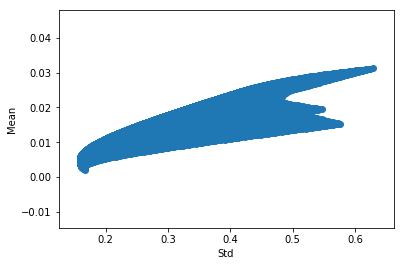

Best Sharpe of any combination of these Apple, Google, Microsoft, and Amazon: 0.0594626651438306
Apple portion: 28 Google portion: 26 Microsoft portion: 10 Amazon portion: 36


In [61]:
meanL = []
stdL = []
sharpe = 0
best_combo = (0,0,0,0)
t0 = time()
for combo in list_of_values:
    returns = (return_aapl["Returns"]*combo[0]) + (return_goog["Returns"]*combo[1]) + (return_msft["Returns"]*combo[2]) \
    + (return_amzn["Returns"]*combo[3])
    
    mean = returns.mean() 
    std = returns.std()
    meanL.append(mean)
    stdL.append(std)
    
    if (mean/std) > sharpe:
        sharpe = mean/std
        best_combo = combo

print("Run time:", round(time()-t0, 3), "s")
    
plt.scatter(stdL, meanL)
plt.xlabel("Std")
plt.ylabel("Mean")
plt.show()
print("Best Sharpe of any combination of these Apple, Google, Microsoft, and Amazon:", sharpe)
print("Apple portion:", best_combo[0],"Google portion:", best_combo[1], "Microsoft portion:", best_combo[2], \
      "Amazon portion:", best_combo[3])